In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('Wholesale Customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [57]:
df.drop(['Channel', 'Region'], inplace=True, axis=1)

In [58]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [59]:
print("Wholesale customers dataset has {} samples with {} features each.".format(*df.shape))


Wholesale customers dataset has 440 samples with 6 features each.


In [60]:
df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [61]:
s_scores = df.describe()
s_scores

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [62]:
#Implementation: Selecting Samples
#To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add three indices of your choice to the indices list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [63]:
# Using data.iloc to filter a pandas DataFrame
df.iloc[[100, 200, 300],:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [64]:
# Retrieve column names
# Alternative code:
# data.keys()
df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [65]:
#Logic in selecting the 3 samples: Quartiles

#As you can previously (in the object "stats"), we've the data showing the first and third quartiles.
#We can filter samples that are starkly different based on the quartiles.
#This way we've two establishments that belong in the first and third quartiles respectively in, for example, the Frozen category.

In [66]:
#filter.. in column fresh (1st quartile: 25% )

fresh_q1 = 3127.750000
df.loc[df.Fresh < fresh_q1, :].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [67]:
#  filter at frozen column for first quartile, means at 25%
frozen_q1 = 742.250000
df.loc[df.Frozen < frozen_q1, :].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931


In [68]:
frozen_q3= 3554.250000
df.loc[df.Frozen > frozen_q3, :].head(7)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916


In [69]:
#Hence we'll be choosing:

#43: Very low "Fresh" and very high "Grocery"
#12: Very low "Frozen" and very high "Fresh"
#39: Very high "Frozen" and very low "Detergens_Paper"

In [70]:
#Select three indices of your choice you wish to sample from the dataset
indices = [43, 12, 39]
# creating a DataFrame of the chosen samples
# .reset_index(drop = True) resets the index from 0, 1 and 2 instead of 43, 12 & 39 

In [71]:
dfnew = pd.DataFrame(df.loc[indices], columns=df.columns).reset_index(drop=True)

In [72]:
dfnew

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


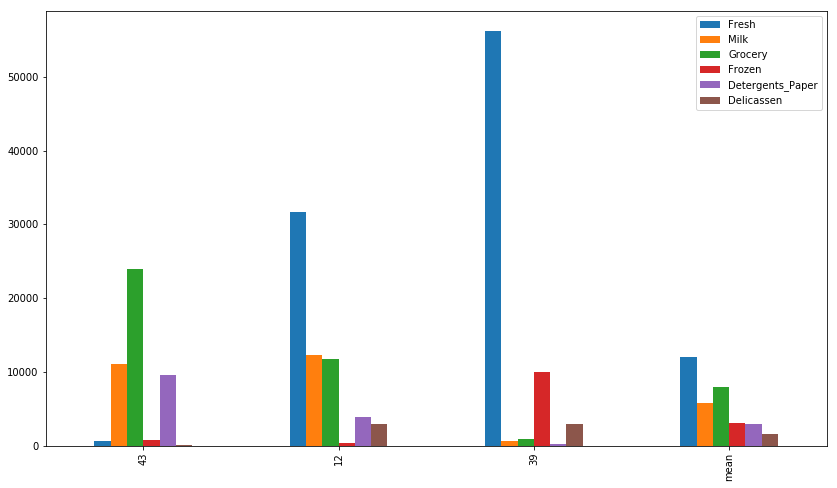

In [73]:
mean_data = df.describe().loc['mean', :]
# Append means to the dfnew' data

dfnew_bar= dfnew.append(mean_data)

dfnew_bar.index = indices + ['mean']
#dfnew_bar.index= [43,12,39] + ['mean']

dfnew_bar.plot(kind='bar', figsize=(14,8))
plt.show()

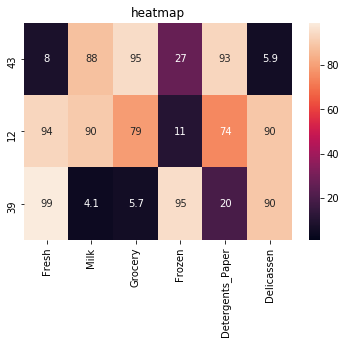

In [74]:
# lets find out the percentile rank of the complete dataset

#formula = data.rank(pct=True)

percentiles = df.rank(pct=True)

#round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Selecting the indices from the percentiles dataframe
percentiles = percentiles.iloc[indices]

sns.heatmap(percentiles, vmin=1, vmax=99, annot=True )
plt.title('heatmap')
plt.show()

In [75]:
k = list(df.columns)
k

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [76]:
dfc= df.copy()

dfc.head()

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor


In [81]:
#for j in k:
   # new_data= dfc.drop([j], axis = 1)
    # Create feature Series (Vector)
    new_feature = pd.DataFrame(dfc.loc[:, j])
    x_train,x_test,y_train,y_test=train_test_split(new_data, new_feature, test_size=.25, random_state=42)
    dtr = DecisionTreeRegressor(random_state=42)
    dtr.fit(x_train,y_train)
   # score=dtr.score(x_train,x_test)
  # print("r2 score for {} as depedent variable:{}".format(j,score))

IndentationError: unexpected indent (<ipython-input-81-9a8d99307f39>, line 4)

In [80]:
new_feature.head()

NameError: name 'new_feature' is not defined

# Create list to loop through
#dep_vars = list(dfc.columns)


# Create loop to test each feature as a dependent variable
#for var in dep_vars:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = dfc.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(dfc.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # Returns R^2
    score = dtr.score(X_test, y_test)
   # print('R2 score for {} as dependent variable: {}'.format(var, score))

In [ ]:
dfc.head()

In [ ]:
m = dfc.columns
for l in m:
    new_data = dfc.drop([l], axis=1)
    new_feature= pd.DataFrame(dfc.loc[:, l])
    x_train,x_test,y_train,y_test=train_test_split(new_data, new_feature, test_size=.23, random_state=47)
    dtr= DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    scored=dtr.score(x_test,y_test)
    print('r2 score for {} as dependent variable : {}'.format(l,scored))

In [ ]:
#pd.plotting.scatter_matrix(dfc,  alpha = .3, figsize=(14,8), diagonal='kde') Kernel Density Estimation or Histogram plot in the diagonal



#dfccorr= dfc.corr()
#plt.figure(figsize=(15,15))

#plt.xticks(range(len(dfccorr.columns)), dfccorr.columns);
#plt.yticks(range(len(dfccorr.columns)), dfccorr.columns);
#sns.heatmap(dfccorr, cmap='Reds', annot=True)


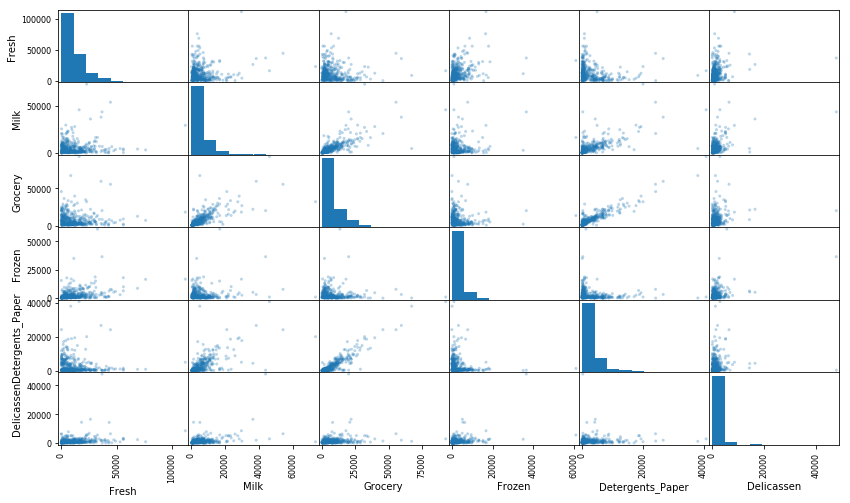

In [82]:
pd.plotting.scatter_matrix(dfc,  alpha = .3, figsize=(14,8), diagonal='hist')
plt.show()

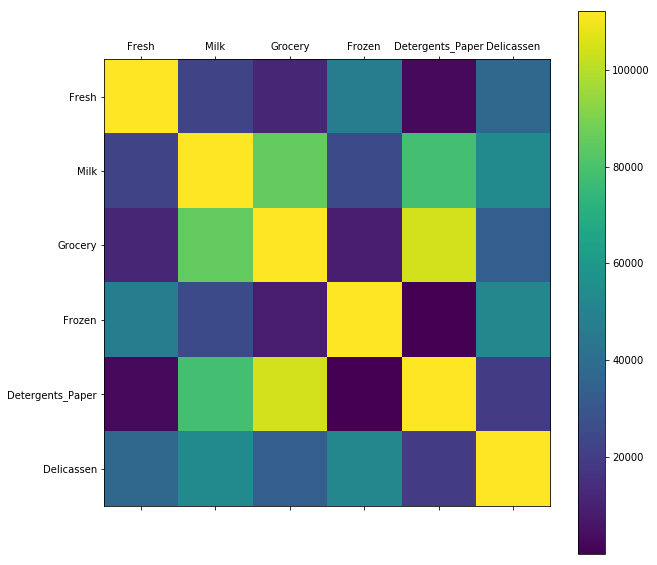

In [106]:
%matplotlib inline
#def plot_corr(dfc,size=10):
    #'''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    #Input:
     #   dfc: pandas DataFrame
     #   size: vertical and horizontal size of the plot'''

   # corr = dfc.corr()
   # fig, ax = plt.subplots(figsize=(size, size))
   # cax = ax.matshow(dfc)
   # ax.matshow(corr)
   # fig.colorbar(cax)
    
   # plt.xticks(range(len(corr.columns)), corr.columns)
    #plt.yticks(range(len(corr.columns)), corr.columns)


#plot_corr(dfc)

def plot_corr(dfc, size=10):
    corr = dfc.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    
    cx = ax.matshow(dfc)    #AX USED FOR AXESPLOT
    ax.matshow(corr)
    fig.colorbar(cx)
    
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(dfc)
    

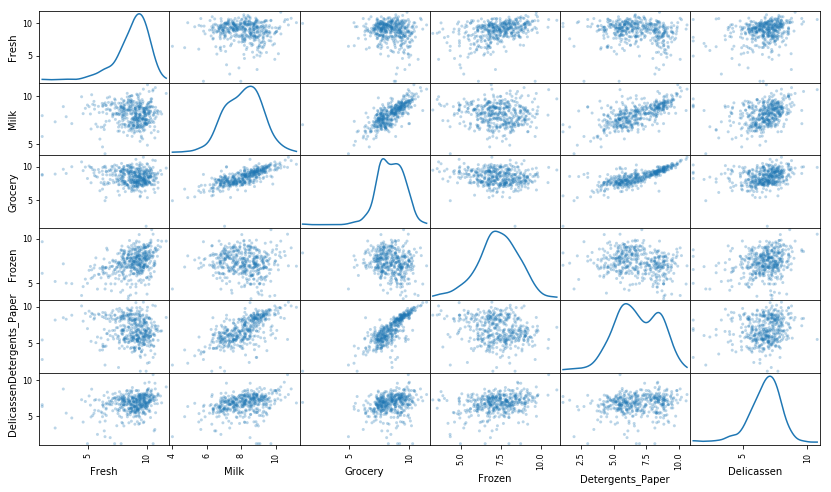

In [107]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(dfc)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(dfnew)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [108]:
log_samples   #np.log(dfnew)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
1,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
2,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968


In [110]:
log_data.head()  #np.log(dfc)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [111]:
# calling plotting corr function and plotting log samples data and log data

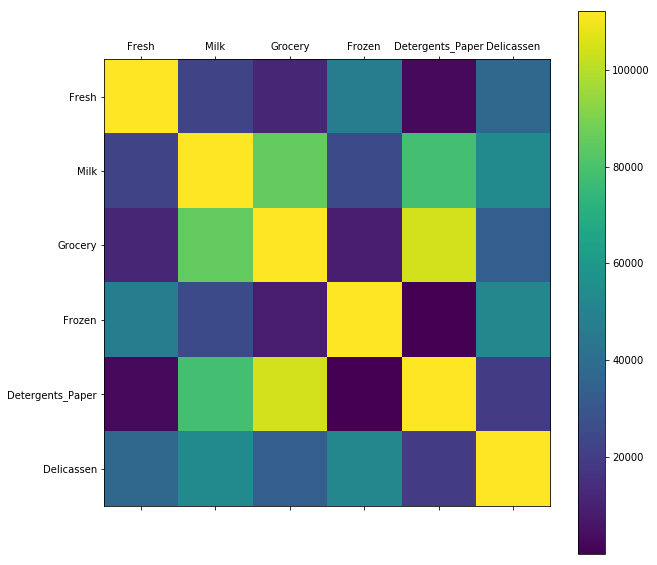

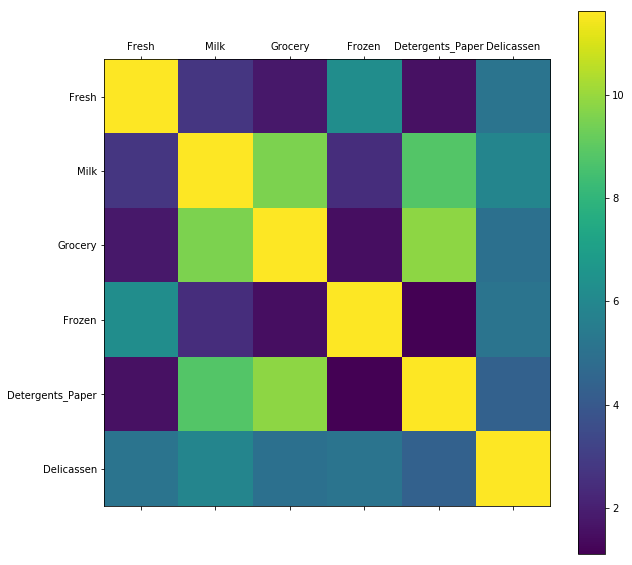

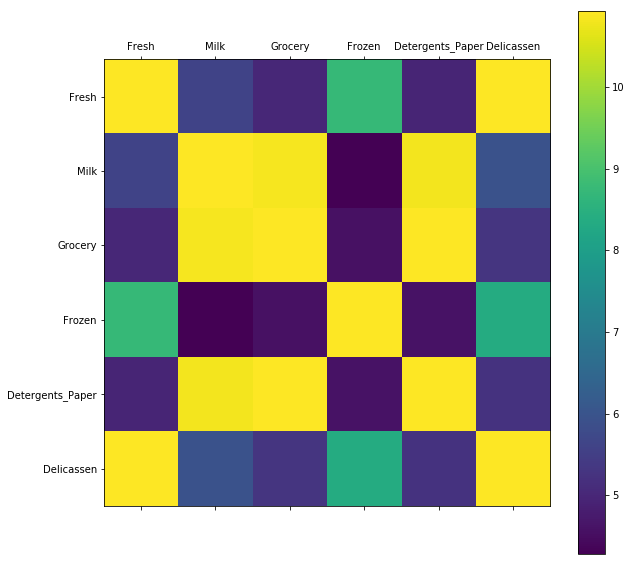

In [113]:
plot_corr(dfc)
plot_corr(log_data)
plot_corr(log_samples)